In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, auc,roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
hp_df = pd.read_csv('C:/Users/Karthik/Downloads/1355844-Logistic_Regression_Assignment/Logistic_Regression_Assignment\heart.csv',delimiter ='\t')

In [3]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    bool   
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: bool(1), float64(1), int64(6), object(6)
memory usage: 31.2+ KB


In [4]:
hp_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,asymptomatic,145,233,True,Normal,150,No,2.3,Up_Sloping,0,1,Yes
1,37,Male,non-anginal pain,130,250,False,Not_Normal,187,No,3.5,Up_Sloping,0,2,Yes
2,41,Female,atypical angina,130,204,False,Normal,172,No,1.4,Down_Sloping,0,2,Yes
3,56,Male,atypical angina,120,236,False,Not_Normal,178,No,0.8,Down_Sloping,0,2,Yes
4,57,Female,typical angina,120,354,False,Not_Normal,163,Yes,0.6,Down_Sloping,0,2,Yes


In [5]:
hp_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
hp_df.shape

(303, 14)

In [7]:
hp_df.describe()

,age,trestbps,chol,thalach,oldpeak,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,2.313531
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.612277
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,2.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,2.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,3.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,3.000000


## Preprocessing

In [8]:
label_encoder = preprocessing.LabelEncoder()

In [9]:
hp_df['cp'] = label_encoder.fit_transform(hp_df['cp'])

In [10]:
hp_df['restecg'] = label_encoder.fit_transform(hp_df['restecg'])

In [11]:
hp_df['slope'] = label_encoder.fit_transform(hp_df['slope'])

In [12]:
hp_df['fbs'] = label_encoder.fit_transform(hp_df['fbs'])
hp_df['exang'] = label_encoder.fit_transform(hp_df['exang'])

In [13]:
hp_df['target'] = hp_df['target'].replace({'Yes':1,'No':0})

In [14]:
s = pd.get_dummies(hp_df['sex'])

In [15]:
s.drop(['Female'],axis=1)

,Male
0,1
1,1
2,0
3,1
4,0
...,...
298,0
299,1
300,1
301,1


In [16]:
hp_df['sex'] = s['Male']

In [17]:
hp_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,2,145,233,1,1,150,0,2.3,2,0,1,1
1,37,1,0,130,250,0,2,187,0,3.5,2,0,2,1
2,41,0,3,130,204,0,1,172,0,1.4,0,0,2,1
3,56,1,3,120,236,0,2,178,0,0.8,0,0,2,1
4,57,0,1,120,354,0,2,163,1,0.6,0,0,2,1


## Probability Density Function

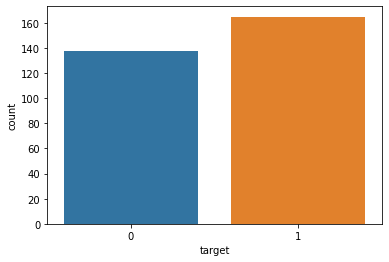

In [18]:
sns.countplot(x = 'target', data = hp_df)
plt.show()

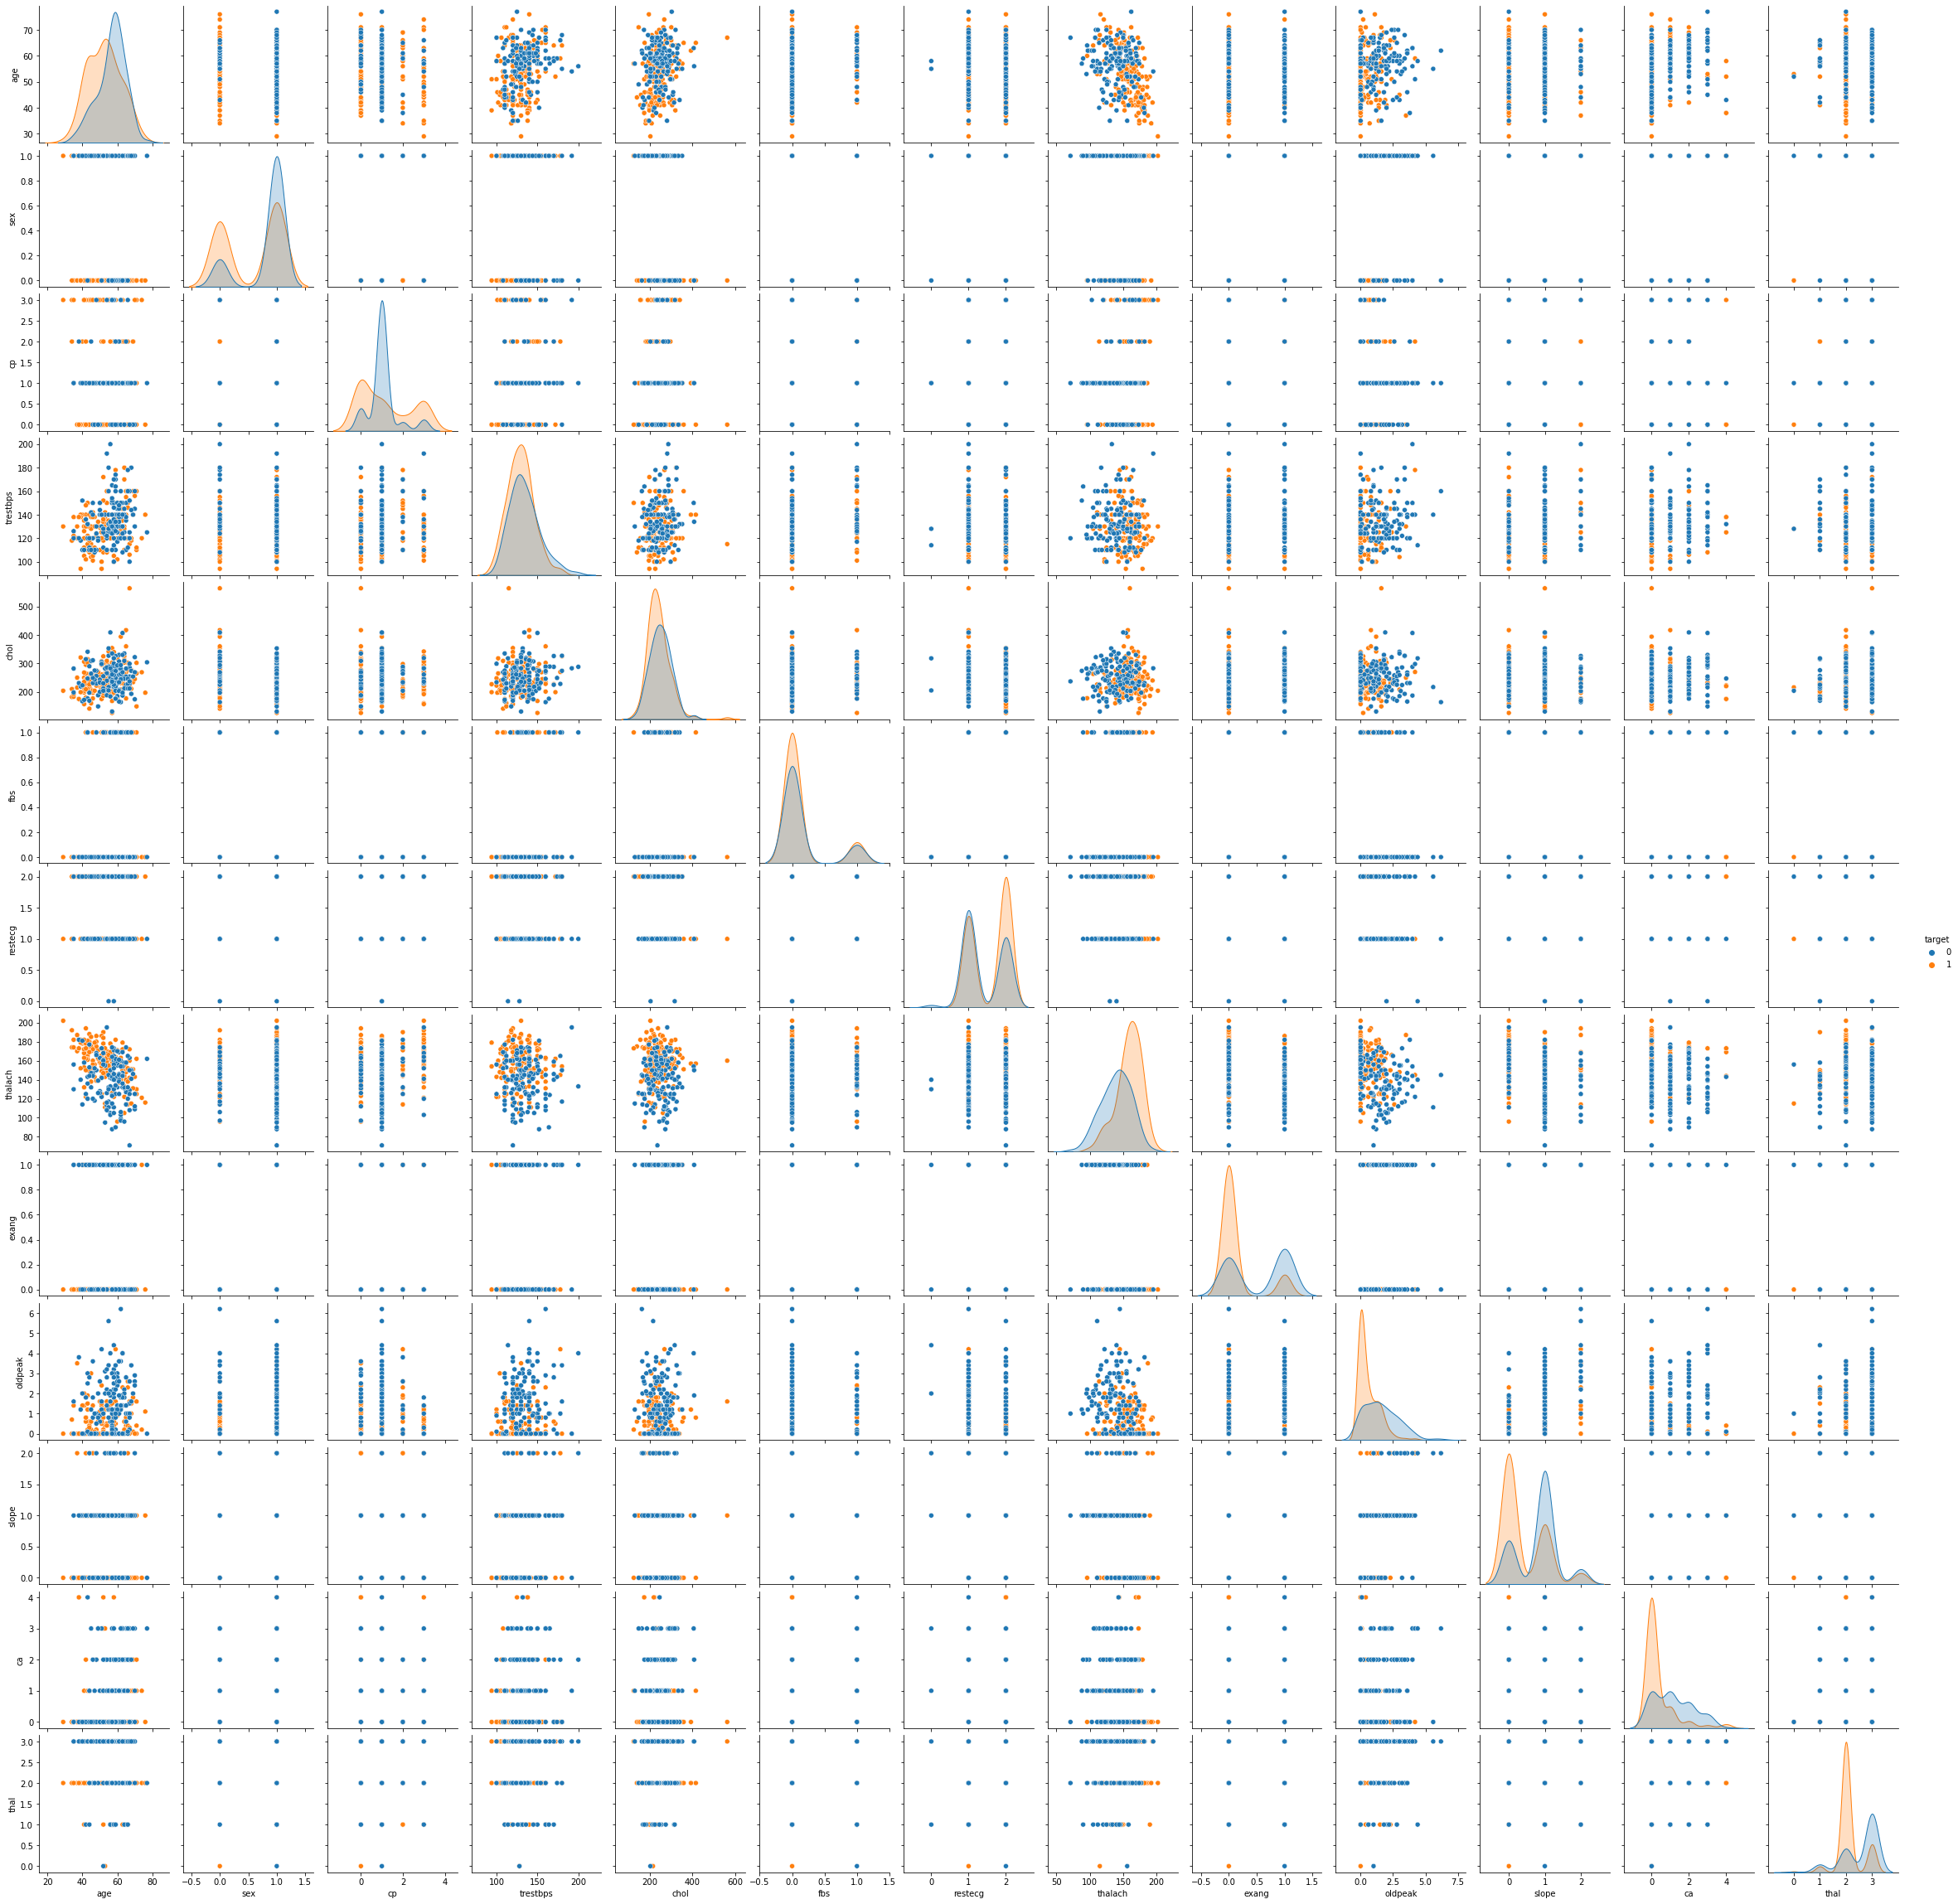

In [19]:
sns.pairplot(hp_df, hue = 'target') 

<AxesSubplot:>

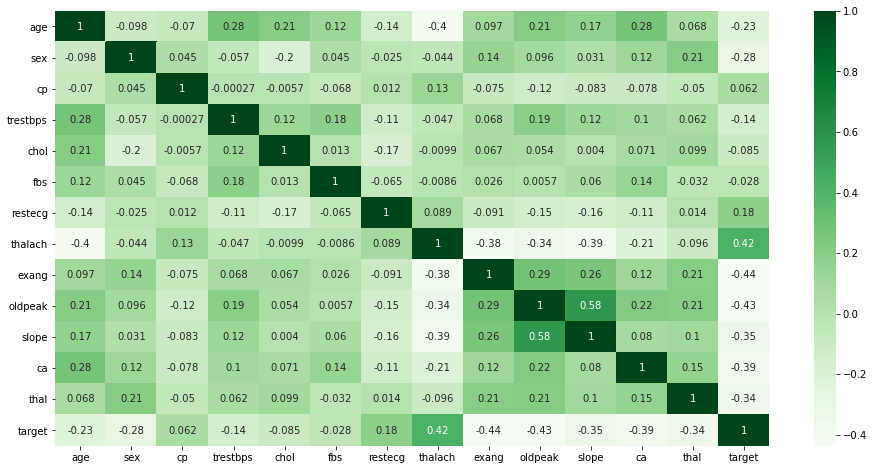

In [20]:
plt.figure(figsize = (16,8))
sns.heatmap(hp_df.corr(), annot=True, cmap = 'Greens')

C:\Users\Karthik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

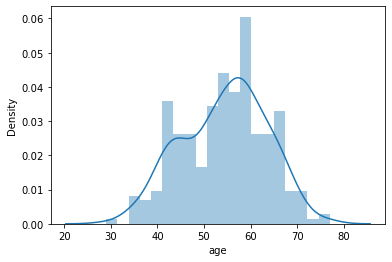

In [21]:
sns.distplot(hp_df['age'],bins = 20)

C:\Users\Karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

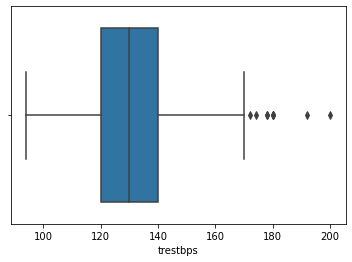

In [22]:
sns.boxplot(hp_df['trestbps'])

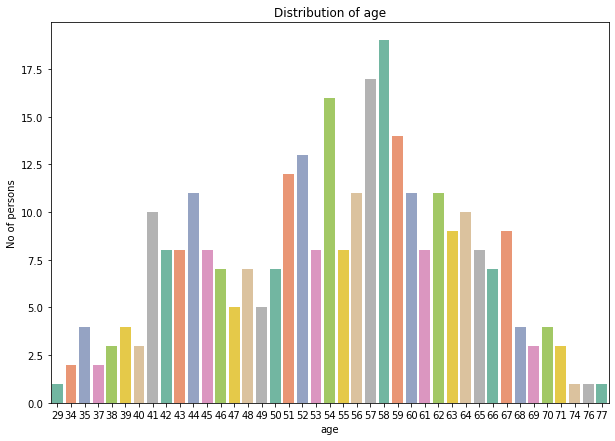

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(x='age',data=hp_df, palette='Set2')
plt.title('Distribution of age')
plt.ylabel('No of persons')
plt.show()

C:\Users\Karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


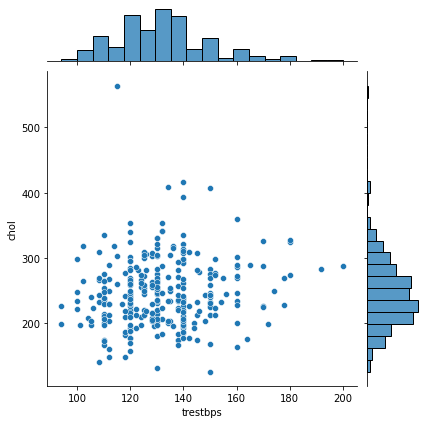

In [24]:
sns.jointplot(hp_df['trestbps'],hp_df['chol'])

## Dealing with Outliers

In [25]:
# Checking for outliers in trestbps column

q3,q1 = np.percentile(hp_df.trestbps,[75,25])
test_IQR = q3-q1
test_upper_outliers = q3 + 1.5* test_IQR
test_lower_outliers= q3 - 1.5 * test_IQR
test_outliers_ind = hp_df[hp_df['trestbps']>test_upper_outliers].index
hp_df[hp_df['trestbps']>test_upper_outliers]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,0,172,199,1,2,162,0,0.5,0,0,3,1
101,59,1,2,178,270,0,1,145,0,4.2,2,0,3,1
110,64,0,1,180,325,0,2,154,1,0.0,0,0,2,1
203,68,1,0,180,274,1,1,150,1,1.6,1,0,3,0
223,56,0,1,200,288,1,1,133,1,4.0,2,2,3,0
241,59,0,1,174,249,0,2,143,1,0.0,1,0,2,0
248,54,1,3,192,283,0,1,195,0,0.0,0,1,3,0
260,66,0,1,178,228,1,2,165,1,1.0,1,2,3,0
266,55,0,1,180,327,0,2,117,1,3.4,1,0,2,0


In [26]:
# Removing outliers in trestbps column

hp_df.drop(index = test_outliers_ind, axis=0, inplace =True)
hp_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,2,145,233,1,1,150,0,2.3,2,0,1,1
1,37,1,0,130,250,0,2,187,0,3.5,2,0,2,1
2,41,0,3,130,204,0,1,172,0,1.4,0,0,2,1
3,56,1,3,120,236,0,2,178,0,0.8,0,0,2,1
4,57,0,1,120,354,0,2,163,1,0.6,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,1,140,241,0,2,123,1,0.2,1,0,3,0
299,45,1,2,110,264,0,2,132,0,1.2,1,0,3,0
300,68,1,1,144,193,1,2,141,0,3.4,1,2,3,0
301,57,1,1,130,131,0,2,115,1,1.2,1,1,3,0


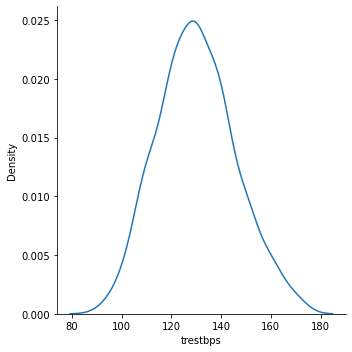

In [27]:
sns.displot(hp_df.trestbps, kind = 'kde')

In [28]:
# Checking for outliers in thalach column

q3a,q1a = np.percentile(hp_df.thalach,[75,25])
thalach_IQR = q3a-q1a
thalach_upper_outliers = q3a + 1.5* thalach_IQR
thalach_lower_outliers= q3a - 1.5 * thalach_IQR
thalach_outliers_ind = hp_df[hp_df['thalach']>thalach_upper_outliers].index
hp_df[hp_df['thalach']>thalach_upper_outliers]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [29]:
# Removing outliers in thalach 

hp_df.drop(index =thalach_outliers_ind, axis=0, inplace =True)
hp_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,2,145,233,1,1,150,0,2.3,2,0,1,1
1,37,1,0,130,250,0,2,187,0,3.5,2,0,2,1
2,41,0,3,130,204,0,1,172,0,1.4,0,0,2,1
3,56,1,3,120,236,0,2,178,0,0.8,0,0,2,1
4,57,0,1,120,354,0,2,163,1,0.6,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,1,140,241,0,2,123,1,0.2,1,0,3,0
299,45,1,2,110,264,0,2,132,0,1.2,1,0,3,0
300,68,1,1,144,193,1,2,141,0,3.4,1,2,3,0
301,57,1,1,130,131,0,2,115,1,1.2,1,1,3,0


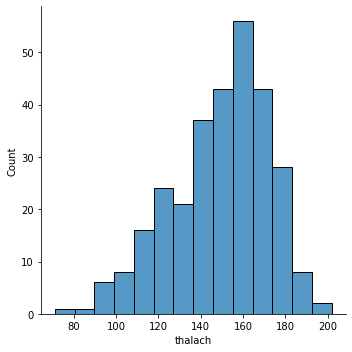

In [30]:
sns.displot(hp_df.thalach)

In [31]:
# Checking for outliers in chol column

q3b,q1b = np.percentile(hp_df.chol,[75,25])
chol_IQR = q3b-q1b
chol_upper_outliers = q3b + 1.5* chol_IQR
chol_lower_outliers= q3b - 1.5 * chol_IQR
chol_outliers_ind = hp_df[hp_df['chol']>chol_upper_outliers].index
hp_df[hp_df['chol']>chol_upper_outliers]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,0,140,417,1,1,157,0,0.8,0,1,2,1
85,67,0,0,115,564,0,1,160,0,1.6,1,0,3,1
96,62,0,1,140,394,0,1,157,0,1.2,1,0,2,1
220,63,0,1,150,407,0,1,154,0,4.0,1,3,3,0
246,56,0,1,134,409,0,1,150,1,1.9,1,2,3,0


In [32]:
# Removing outliers in chol

hp_df.drop(index =chol_outliers_ind, axis=0, inplace =True)
hp_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,2,145,233,1,1,150,0,2.3,2,0,1,1
1,37,1,0,130,250,0,2,187,0,3.5,2,0,2,1
2,41,0,3,130,204,0,1,172,0,1.4,0,0,2,1
3,56,1,3,120,236,0,2,178,0,0.8,0,0,2,1
4,57,0,1,120,354,0,2,163,1,0.6,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,1,140,241,0,2,123,1,0.2,1,0,3,0
299,45,1,2,110,264,0,2,132,0,1.2,1,0,3,0
300,68,1,1,144,193,1,2,141,0,3.4,1,2,3,0
301,57,1,1,130,131,0,2,115,1,1.2,1,1,3,0


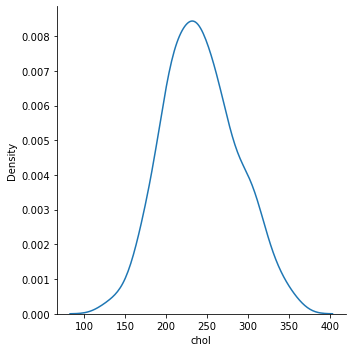

In [33]:
sns.displot(hp_df.chol, kind = 'kde')

## Logistic Regression

In [34]:
X = hp_df.drop(['target'], axis =1)
y = hp_df['target']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 24)

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(X_train,y_train)

C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
predictions = lr.predict(X_test)
predictions_train = lr.predict(X_train)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.61      0.70        36
           1       0.77      0.90      0.83        51

    accuracy                           0.78        87
   macro avg       0.79      0.76      0.76        87
weighted avg       0.79      0.78      0.77        87



In [41]:
print(accuracy_score(y_test, predictions))

0.7816091954022989


In [42]:
cm = confusion_matrix(y_test,predictions)

<AxesSubplot:>

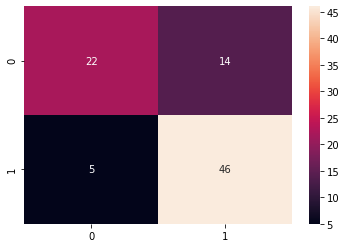

In [43]:
sns.heatmap(cm,annot =True)

In [44]:
FPR, TPR,_ = roc_curve(y_train,predictions_train)
FPR1, TPR1,_ = roc_curve(y_test,predictions)


In [45]:
auc_train = auc(FPR,TPR)
print('Train AUC:%0.3f' % auc_train)

auc_test = auc(FPR1,TPR1)
print('Test AUC:%0.3f' % auc_test)

Train AUC:0.845
Test AUC:0.757


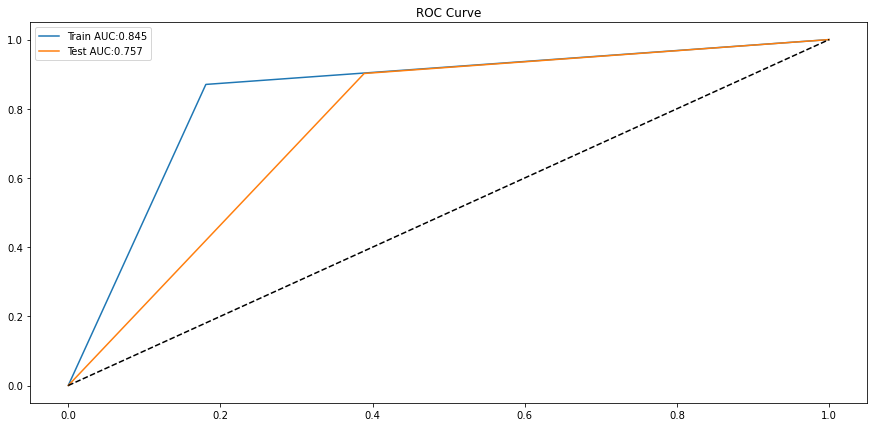

In [46]:
plt.figure(figsize = (15,7))
plt.plot(FPR,TPR, label = 'Train AUC:%0.3f' % auc_train)
plt.plot(FPR1,TPR1, label = 'Test AUC:%0.3f' % auc_test)

plt.plot([0,1],[0,1], ls='--', color ='black')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Confusion Matrix, Clssification_Report, ROC_AUC Curve

In [47]:
true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]

In [48]:
Accuracy = (true_positive + true_negative) /(true_positive + false_positive + false_negative + true_negative)
Accuracy

0.7816091954022989

In [49]:
Precision = true_positive / (true_positive + false_positive)
Precision

0.6111111111111112

In [50]:
Recall = true_positive / (true_positive + false_negative)
Recall

0.8148148148148148

In [51]:
Specificity = true_negative / (true_negative + false_positive)
Specificity

0.7666666666666667

In [52]:
auc = roc_auc_score(y_test,predictions)
auc

0.7565359477124183